<a href="https://colab.research.google.com/github/rayhannarindran/fitmotion_model/blob/main/trainingScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

# **Dataset Initiation**

First we load the dataset into a dataframe so it is easier to work with, by getting all the paths to files and concatenating all the data into one dataframe, this dataframe includes all the information about the gyro and also the motion done, with the labels.

In [69]:
# change these following three lines only
subject_data_file = 'data_subjects_info.csv'
data_dir = 'dataset'

# List all files in a directory using os.listdir
def get_file_paths(data_dir):
    files = []
    for dirname, _, filenames in os.walk(data_dir):
        for filename in filenames:
            files.append(os.path.join(dirname, filename))
    return files

def get_all_data(file_paths, meta):
    df = pd.DataFrame()

    for p in file_paths:
        print(p)
        c_dir, c_file = p.split('\\')[-2], p.split('\\')[-1]
        c_cat, c_ses = c_dir.split('_')[-2], c_dir.split('_')[-1]
        c_sub = c_file.split('_')[-1].split('.')[-2]
        
        tdf = pd.read_csv(p, encoding = "utf-8")
        tdf = tdf.assign(subject_id = int(c_sub))
        tdf = tdf.assign(session_id = int(c_ses))
        tdf = tdf.assign(category = str(c_cat))
        tdf = tdf.assign(age = int(meta.age[int(c_sub) - 1]))
        tdf = tdf.assign(gender = int(meta.gender[int(c_sub) - 1]))
        tdf = tdf.assign(height = int(meta.height[int(c_sub) - 1]))
        tdf = tdf.assign(weight = int(meta.weight[int(c_sub) - 1]))

        df = pd.concat([df, tdf])
    df.reset_index(drop=True, inplace=True)
    return df
    
subject_data_frame = pd.read_csv(subject_data_file)
file_paths = get_file_paths(data_dir)
data_frame = get_all_data(file_paths, subject_data_frame)

dataset\dws_1\sub_1.csv
dataset\dws_1\sub_10.csv
dataset\dws_1\sub_11.csv
dataset\dws_1\sub_12.csv
dataset\dws_1\sub_13.csv
dataset\dws_1\sub_14.csv
dataset\dws_1\sub_15.csv
dataset\dws_1\sub_16.csv
dataset\dws_1\sub_17.csv
dataset\dws_1\sub_18.csv
dataset\dws_1\sub_19.csv
dataset\dws_1\sub_2.csv
dataset\dws_1\sub_20.csv
dataset\dws_1\sub_21.csv
dataset\dws_1\sub_22.csv
dataset\dws_1\sub_23.csv
dataset\dws_1\sub_24.csv
dataset\dws_1\sub_3.csv
dataset\dws_1\sub_4.csv
dataset\dws_1\sub_5.csv
dataset\dws_1\sub_6.csv
dataset\dws_1\sub_7.csv
dataset\dws_1\sub_8.csv
dataset\dws_1\sub_9.csv
dataset\dws_11\sub_1.csv
dataset\dws_11\sub_10.csv
dataset\dws_11\sub_11.csv
dataset\dws_11\sub_12.csv
dataset\dws_11\sub_13.csv
dataset\dws_11\sub_14.csv
dataset\dws_11\sub_15.csv
dataset\dws_11\sub_16.csv
dataset\dws_11\sub_17.csv
dataset\dws_11\sub_18.csv
dataset\dws_11\sub_19.csv
dataset\dws_11\sub_2.csv
dataset\dws_11\sub_20.csv
dataset\dws_11\sub_21.csv
dataset\dws_11\sub_22.csv
dataset\dws_11\sub_23

In [70]:
# Show the info for dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412865 entries, 0 to 1412864
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          1412865 non-null  int64  
 1   attitude.roll       1412865 non-null  float64
 2   attitude.pitch      1412865 non-null  float64
 3   attitude.yaw        1412865 non-null  float64
 4   gravity.x           1412865 non-null  float64
 5   gravity.y           1412865 non-null  float64
 6   gravity.z           1412865 non-null  float64
 7   rotationRate.x      1412865 non-null  float64
 8   rotationRate.y      1412865 non-null  float64
 9   rotationRate.z      1412865 non-null  float64
 10  userAcceleration.x  1412865 non-null  float64
 11  userAcceleration.y  1412865 non-null  float64
 12  userAcceleration.z  1412865 non-null  float64
 13  subject_id          1412865 non-null  int64  
 14  session_id          1412865 non-null  int64  
 15  category       

In [71]:
# Copying dataframe and dropping unnecessary columns
df = data_frame.copy()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('subject_id', axis=1, inplace=True)
df.drop('session_id', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)
df.drop('height', axis=1, inplace=True)
df.drop('weight', axis=1, inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412865 entries, 0 to 1412864
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   attitude.roll       1412865 non-null  float64
 1   attitude.pitch      1412865 non-null  float64
 2   attitude.yaw        1412865 non-null  float64
 3   gravity.x           1412865 non-null  float64
 4   gravity.y           1412865 non-null  float64
 5   gravity.z           1412865 non-null  float64
 6   rotationRate.x      1412865 non-null  float64
 7   rotationRate.y      1412865 non-null  float64
 8   rotationRate.z      1412865 non-null  float64
 9   userAcceleration.x  1412865 non-null  float64
 10  userAcceleration.y  1412865 non-null  float64
 11  userAcceleration.z  1412865 non-null  float64
 12  category            1412865 non-null  object 
dtypes: float64(12), object(1)
memory usage: 140.1+ MB


# **Data Preprocessing**

In [73]:
from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
labels = lEncoder.fit(df.category)
df['code'] = lEncoder.transform(df.category)
df.drop('category', axis=1, inplace=True)
df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,code
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,0
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,0
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,0
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,0
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,0.890518,-1.300928,0.089878,0.207249,0.963806,-0.167690,-0.920226,0.406762,-0.383194,0.044079,-0.204574,0.204906,5
1412861,0.929499,-1.319499,0.124063,0.199247,0.968591,-0.148750,-0.923594,0.231559,-0.521862,0.066348,-0.222604,0.225136,5
1412862,0.966103,-1.340284,0.159858,0.187951,0.973550,-0.129883,-0.970054,0.003083,-0.621238,-0.005959,-0.054040,0.240632,5
1412863,1.005158,-1.362495,0.201540,0.174576,0.978384,-0.110827,-1.005371,-0.108297,-0.708937,-0.007767,-0.003927,0.194735,5


In [74]:
from sklearn.model_selection import train_test_split

x_columns = df.iloc[:, 0:12]
y_columns = df.iloc[:, 12:13]

trainx, testx, trainy, testy = train_test_split(x_columns, y_columns, test_size=0.2, shuffle=False)
assert(len(trainx) == len(trainy))

In [75]:
# Preview the data
print(trainx.head())
print(trainy.head())
print(testx.head())
print(testy.head())

   attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0       1.528132       -0.733896      0.696372   0.741895   0.669768   
1       1.527992       -0.716987      0.677762   0.753099   0.657116   
2       1.527765       -0.706999      0.670951   0.759611   0.649555   
3       1.516768       -0.704678      0.675735   0.760709   0.647788   
4       1.493941       -0.703918      0.672994   0.760062   0.647210   

   gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \
0  -0.031672        0.316738        0.778180        1.082764   
1  -0.032255        0.842032        0.424446        0.643574   
2  -0.032707       -0.138143       -0.040741        0.343563   
3  -0.041140       -0.025005       -1.048717        0.035860   
4  -0.058530        0.114253       -0.912890        0.047341   

   userAcceleration.x  userAcceleration.y  userAcceleration.z  
0            0.294894           -0.184493            0.377542  
1            0.219405            0.035846            0

# **Model Training**

In [76]:
WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

In [77]:
from scipy.stats import mode

def sequence_generator(x, y, length, stride):
    seq_x = []
    seq_y = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        target_sequence = y.iloc[i : i + length]
        target_mode = mode(target_sequence.values)[0][0]
        seq_x.append(input_sequence)
        seq_y.append(target_mode)
    return np.array(seq_x), np.array(seq_y)

tx, ty = sequence_generator(trainx, trainy, WINDOW_LENGTH, STRIDE_LENGTH)
vx, vy = sequence_generator(testx, testy, WINDOW_LENGTH, STRIDE_LENGTH)

In [78]:
from keras.utils import to_categorical

tty = to_categorical(ty, num_classes=NUM_CLASSES)
vvy = to_categorical(vy, num_classes=NUM_CLASSES)

In [79]:
from keras.layers import LSTM, GRU
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Flatten
from keras.optimizers import Adam

In [80]:
model = Sequential(
    [
        Input(shape=(WINDOW_LENGTH, NUM_FEATURES)),
        LSTM(6, input_shape=(NUM_FEATURES, NUM_FEATURES), return_sequences=True),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(NUM_CLASSES, activation='softmax')
    ]
)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 150, 6)            456       
                                                                 
 flatten_14 (Flatten)        (None, 900)               0         
                                                                 
 dense_28 (Dense)            (None, 128)               115328    
                                                                 
 dense_29 (Dense)            (None, 6)                 774       
                                                                 
Total params: 116,558
Trainable params: 116,558
Non-trainable params: 0
_________________________________________________________________


In [81]:
history = model.fit(tx, tty, validation_data = (vx, vvy), epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE)

Epoch 1/10
1131/1131 [==============================] - 14s 11ms/step - loss: 0.1988 - accuracy: 0.9354 - val_loss: 1.0548 - val_accuracy: 0.7293
Epoch 2/10
1131/1131 [==============================] - 12s 11ms/step - loss: 0.0671 - accuracy: 0.9788 - val_loss: 1.5213 - val_accuracy: 0.6904
Epoch 3/10
1131/1131 [==============================] - 12s 11ms/step - loss: 0.0452 - accuracy: 0.9855 - val_loss: 2.0825 - val_accuracy: 0.6225
Epoch 4/10
1131/1131 [==============================] - 13s 12ms/step - loss: 0.0324 - accuracy: 0.9894 - val_loss: 1.4998 - val_accuracy: 0.7501
Epoch 5/10
1131/1131 [==============================] - 13s 11ms/step - loss: 0.0236 - accuracy: 0.9918 - val_loss: 1.4960 - val_accuracy: 0.7674
Epoch 6/10
1131/1131 [==============================] - 13s 11ms/step - loss: 0.0181 - accuracy: 0.9936 - val_loss: 2.0177 - val_accuracy: 0.7216
Epoch 7/10
1131/1131 [==============================] - 12s 11ms/step - loss: 0.0156 - accuracy: 0.9946 - val_loss: 1.9432 -

# **Model Results and Testing**

In [82]:
model.evaluate(vx, vvy, batch_size=BATCH_SIZE)

283/283 [==============================] - 2s 5ms/step - loss: 2.2991 - accuracy: 0.7360


[2.2991487979888916, 0.7360053658485413]

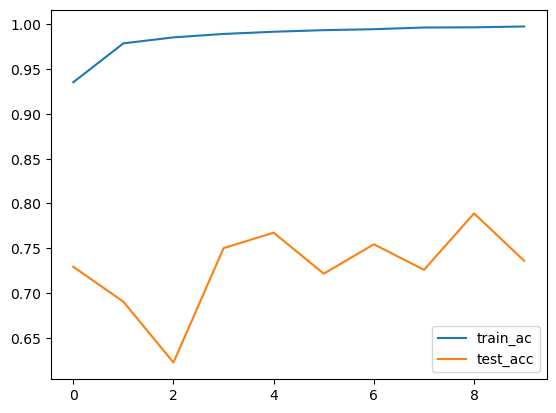

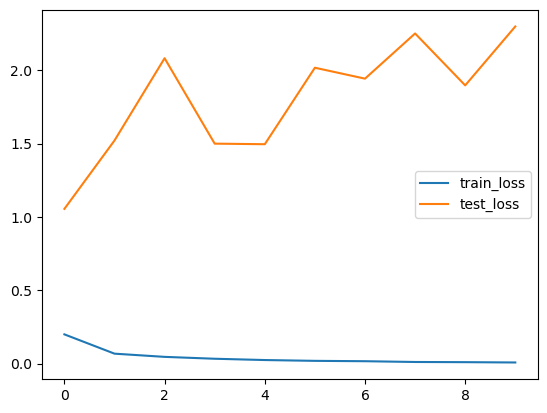

In [83]:
# Accuracy
plt.plot(history.history['accuracy'], label='train_ac')
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

In [84]:
from sklearn.model_selection import StratifiedKFold

NUM_SPLITS = 5

skf = StratifiedKFold(n_splits = NUM_SPLITS, shuffle=False)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(x_columns, y_columns):
    x_train_fold, x_test_fold = x_columns.iloc[train_index], x_columns.iloc[test_index]
    y_train_fold, y_test_fold = y_columns.iloc[train_index], y_columns.iloc[test_index]
    
    tx, ty = sequence_generator(x_train_fold, y_train_fold, WINDOW_LENGTH, STRIDE_LENGTH)
    vx, vy = sequence_generator(x_test_fold, y_test_fold, WINDOW_LENGTH, STRIDE_LENGTH)

    tty = to_categorical(ty, num_classes = NUM_CLASSES)
    vvy = to_categorical(vy, num_classes = NUM_CLASSES)

    model.fit(tx, tty, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE)
    
    test_loss, test_accuracy = model.evaluate(vx, vvy)
    lst_accu_stratified.append(test_accuracy)

Epoch 1/10
1131/1131 [==============================] - 13s 11ms/step - loss: 0.0695 - accuracy: 0.9799
Epoch 2/10
1131/1131 [==============================] - 13s 11ms/step - loss: 0.0297 - accuracy: 0.9901
Epoch 3/10
1131/1131 [==============================] - 10s 9ms/step - loss: 0.0208 - accuracy: 0.9927
Epoch 4/10
1131/1131 [==============================] - 10s 9ms/step - loss: 0.0147 - accuracy: 0.9948
Epoch 5/10
1131/1131 [==============================] - 10s 9ms/step - loss: 0.0105 - accuracy: 0.9964
Epoch 6/10
1131/1131 [==============================] - 10s 9ms/step - loss: 0.0087 - accuracy: 0.9971
Epoch 7/10
1131/1131 [==============================] - 10s 9ms/step - loss: 0.0070 - accuracy: 0.9979
Epoch 8/10
1131/1131 [==============================] - 10s 9ms/step - loss: 0.0065 - accuracy: 0.9978
Epoch 9/10
1131/1131 [==============================] - 10s 9ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 10/10
883/883 [==============================] - 5s 5ms/step - lo

In [85]:
# Saving Model as h5
model.save('model.h5')